# ModelS_SGDOptimizerComData_Executado.ipynb-1

O código abaixo é responsável por definir os caminhos para as pastas de treino, validação e teste. Estas pastas contêm os dados que serão utilizados para treinar, validar e testar o modelo, respetivamente.


In [1]:
import os, shutil
train_dir = 'C:/Users/flavi/Desktop/Projeto-20240530/train'
validation_dir = 'C:/Users/flavi/Desktop/Projeto-20240530/validation'
test_dir = 'C:/Users/flavi/Desktop/Projeto-20240530/test'

# ModelS_SGDOptimizerComData_Executado.ipynb-2

Este bloco de código é utilizado para carregar os conjuntos de dados de treino, validação e teste a partir das pastas especificadas. Utiliza-se a função "image_dataset_from_directory" da biblioteca Keras para este fim. Os parâmetros importantes incluem o caminho da pasta onde as imagens estão armazenadas, o tamanho das imagens (150x150 neste caso) e o tamanho do lote (batch size) para o carregamento dos dados, definido como 32.


In [2]:
from keras.utils import image_dataset_from_directory
IMG_SIZE = 150
train_dataset = image_dataset_from_directory(
train_dir,
image_size=(IMG_SIZE, IMG_SIZE),
batch_size=32)
validation_dataset = image_dataset_from_directory(
validation_dir,
image_size=(IMG_SIZE, IMG_SIZE),
batch_size=32)
test_dataset = image_dataset_from_directory(
test_dir,
image_size=(IMG_SIZE, IMG_SIZE),
batch_size=32)

Found 40000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.


# ModelS_SGDOptimizerComData_Executado.ipynb-3

Aqui definimos um modelo de rede neuronal convolucional (CNN) utilizando a biblioteca TensorFlow e Keras para classificação de imagens em 10 categorias distintas. O processo inclui etapas de pré-processamento de dados, definição da arquitetura do modelo e sua compilação. Aqui está uma explicação detalhada de cada parte:

Importação de Bibliotecas: São importadas as bibliotecas necessárias do TensorFlow, Keras e módulos específicos para o processamento de imagens e construção de modelos.

Aumento de Dados: Utiliza-se uma sequência de técnicas de aumento de dados ("data_augmentation") para melhorar a generalização do modelo. Isso inclui:
   RandomFlip: Inverte as imagens horizontal e verticalmente de forma aleatória.
   RandomRotation: Rotaciona as imagens aleatoriamente dentro de um intervalo de 10%.
   RandomZoom: Aplica um zoom aleatório de até 20% nas imagens.

Preparação da Entrada: Define-se o formato de entrada das imagens ("inputs") com base no tamanho especificado ("IMG_SIZE") e o número de canais de cor (3 para RGB).

Aplicação do Aumento de Dados: O aumento de dados é aplicado diretamente às imagens de entrada.

Reescalamento: As imagens são reescaladas para que os valores dos pixels estejam no intervalo [0, 1], utilizando "Rescaling".

Construção da CNN:
Camadas convolucionais ("Conv2D") com ativação ReLU e normalização por lote ("BatchNormalization") são empilhadas, seguidas por camadas de pooling máximo ("MaxPooling2D") para reduzir a dimensionalidade.
Após as camadas convolucionais, os dados são achatamentos ("Flatten") para uma dimensão, seguidos por uma camada de dropout ("Dropout") para reduzir o overfitting.
Uma camada densa ("Dense") com 512 unidades e ativação ReLU é utilizada antes da camada de saída.

Camada de Saída: A camada de saída utiliza a função de ativação "softmax" para classificar as imagens em uma das 10 categorias.

Compilação do Modelo: O modelo é finalmente criado, ligando as entradas e saídas definidas.


In [3]:
from tensorflow import keras
from keras import layers
from keras import models
from keras.preprocessing import image

data_augmentation = keras.Sequential(
    [
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(inputs)

x = layers.Conv2D(filters=32, kernel_size=3, activation="relu", padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(512, activation="relu")(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

# ModelS_SGDOptimizerComData_Executado.ipynb-4
Aqui, o modelo é compilado com o otimizador SGD, a função de perda "sparse_categorical_crossentropy" para classificação multiclasse e a métrica de "accuracy" para avaliar o desempenho.

ReduceLROnPlateau reduz a taxa de aprendizagem quando uma métrica parou de melhorar. Isso ajuda a refinar os pesos do modelo quando se aproxima de um mínimo local durante o treino.

O callback EarlyStopping interrompe o treino se o "val_loss" não melhorar após um determinado número de épocas ("patience"). Isso previne o overfitting e economiza tempo de treino.

Este callback ModelCheckpoint salva o modelo após cada época, mas apenas se o "val_loss" melhorar. Isso é útil para retomar o treino de onde parou e evitar a perda de um modelo bem treinado devido a uma interrupção inesperada.

Finalmente, o modelo é treinado utilizando os conjuntos de dados de treino e validação, com um número máximo de 30 épocas. Os callbacks definidos anteriormente são passados para o método fit para otimizar o processo de treino.

In [4]:
model.compile(
    optimizer='sgd',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [5]:
from keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=2,
    min_lr=0.001
)

In [6]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [7]:
from keras.callbacks import ModelCheckpoint

model_checkpoint = ModelCheckpoint(
    filepath='C:/Users/flavi/Desktop/projetoClassificaoDeImagens/dl_project_2201707_2211044/ModelosS/ModelS_SGDOptimizerComData.keras',
    save_best_only=True,
    monitor='val_loss'
)

In [8]:
callbacks = [reduce_lr, early_stopping, model_checkpoint]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks
)

Epoch 1/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 542s 433ms/step - accuracy: 0.3991 - loss: 1.9175 - val_accuracy: 0.5346 - val_loss: 1.2933 - learning_rate: 0.0100
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 535s 428ms/step - accuracy: 0.5934 - loss: 1.1395 - val_accuracy: 0.6101 - val_loss: 1.1168 - learning_rate: 0.0100
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 534s 427ms/step - accuracy: 0.6758 - loss: 0.9134 - val_accuracy: 0.6366 - val_loss: 1.0462 - learning_rate: 0.0100
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 532s 426ms/step - accuracy: 0.7444 - loss: 0.7164 - val_accuracy: 0.6434 - val_loss: 1.1034 - learning_rate: 0.0100
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 536s 429ms/step - accuracy: 0.8133 - loss: 0.5312 - val_accuracy: 0.6679 - val_loss: 1.0957 - learning_rate: 0.0100
Epoch 6/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 861s 689ms/step - accuracy: 0.8834 - loss: 0.3384 - val_accuracy: 0.6990 - val_loss: 1.0021 - learning_rate: 0.0020
Epoch 7/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1088s 871m

# ModelS_SGDOptimizerComData_Executado.ipynb-5

Esta parte do código é utilizado para visualizar o desempenho do modelo ao longo das épocas de treino, tanto em termos de precisão ("accuracy") quanto de perda ("loss"). A visualização é feita através de gráficos que mostram a evolução da precisão e da perda no conjunto de treino e validação.


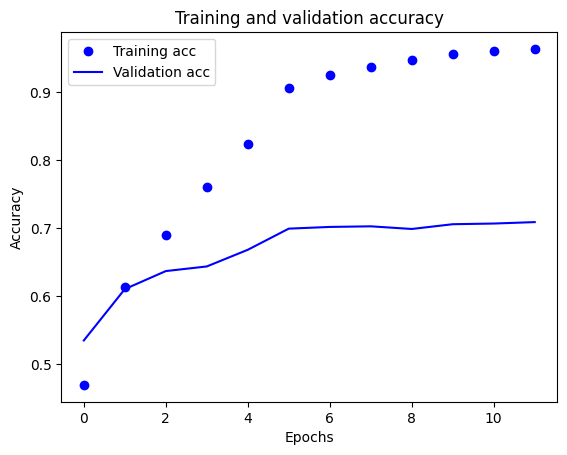

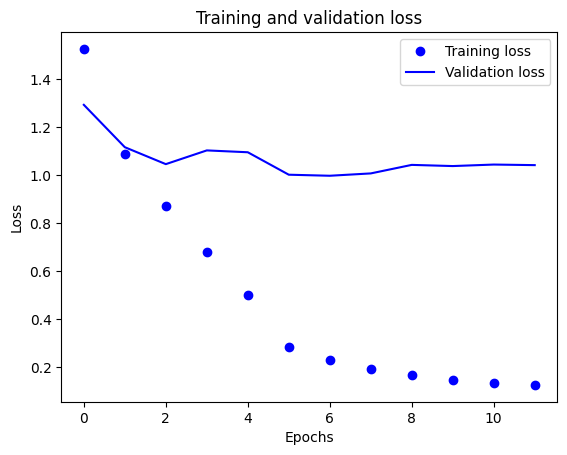

In [9]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], 'bo', label='Training acc')
plt.plot(history.history['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], 'bo', label='Training loss')
plt.plot(history.history['val_loss'], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# ModelS_SGDOptimizerComData_Executado.ipynb-6

Aqui avaliamos o desempenho do modelo treinado nos conjuntos de teste e validação.

O primeiro bloco de código avalia o modelo no conjunto de validação "validation_dataset" e imprime a perda e a precisão.

O segundo bloco de código avalia o modelo no conjunto de teste "test_dataset" e imprime a perda e a precisão.


In [10]:
val_loss, val_acc = model.evaluate(validation_dataset)
print('Validation Accuracy:', val_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 54s 173ms/step - accuracy: 0.7053 - loss: 0.9751
Validation Accuracy: 0.7014999985694885


In [11]:
loss, accuracy = model.evaluate(test_dataset)
print(f"Loss: {loss}, Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 53s 170ms/step - accuracy: 0.6966 - loss: 0.9801
Loss: 0.9928498864173889, Accuracy: 0.6980999708175659


# ModelS_SGDOptimizerComData_Executado.ipynb-7

Avalia.se o desempenho do modelo treinado e visualizando os resultados.

O código começa por importar as bibliotecas necessárias e definindo uma função "evaluate_model" que recebe um modelo e um conjunto de dados, faz previsões para todas as imagens no conjunto de dados e retorna os rótulos verdadeiros e previstos.

Em seguida, ele usa a função "evaluate_model" para obter os rótulos verdadeiros e previstos para o conjunto de teste "test_dataset".

O código então calcula a matriz de confusão e a visualiza usando um mapa de calor.

Finalmente, imprime-se um relatório de classificação e visualiza-se a precisão, a revocação e o F1-score para cada classe.

# Análise dos Resultados de Classificação

A tabela sumariza o desempenho de um modelo de classificação avaliado num conjunto de teste com 10.000 instâncias, distribuídas equitativamente por 10 classes (de 0 a 9). A análise foca-se nas métricas de precisão, recall e pontuação F1 para cada classe, bem como na precisão geral do modelo.

Precisão:
A precisão mede a proporção de identificações positivas que foram corretamente classificadas. A classe 8 registou a maior precisão (0.81), indicando que o modelo foi particularmente eficaz a identificar corretamente as instâncias desta classe. Em contraste, a classe 3 apresentou a menor precisão (0.52), sugerindo uma maior quantidade de falsos positivos para esta classe.

Recall:
O recall avalia a proporção de positivos reais que foram corretamente identificados pelo modelo. A classe 9 teve o maior recall (0.80), mostrando que o modelo foi capaz de capturar a maioria das instâncias desta classe corretamente. A classe 2, com o menor recall (0.54), indica que muitas instâncias desta classe não foram identificadas pelo modelo.

Pontuação F1:
A pontuação F1 é a média harmónica da precisão e do recall, oferecendo um equilíbrio entre estas duas métricas. A classe 1 teve a maior pontuação F1 (0.80), demonstrando um bom equilíbrio entre precisão e recall. A classe 3, com a menor pontuação F1 (0.51), reflete tanto a baixa precisão quanto o baixo recall.

Suporte:
O suporte indica o número de ocorrências reais de cada classe no conjunto de teste, sendo igualmente distribuído com 1000 instâncias por classe.

Análise Geral
O modelo alcançou uma precisão geral (accuracy) de 0.70, o que significa que 70% das previsões foram corretas. As métricas de média macro e média ponderada são ambas 0.70, indicando um desempenho equilibrado entre todas as classes.

Conclusão
Embora o modelo mostre um desempenho razoável em geral, há espaço para melhorias, especialmente nas classes com menor precisão e recall. Estratégias como ajuste de parâmetros, aumento de dados ou técnicas de balanceamento de classes podem ser exploradas para melhorar o desempenho do modelo nas classes com resultados mais baixos.


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 834ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

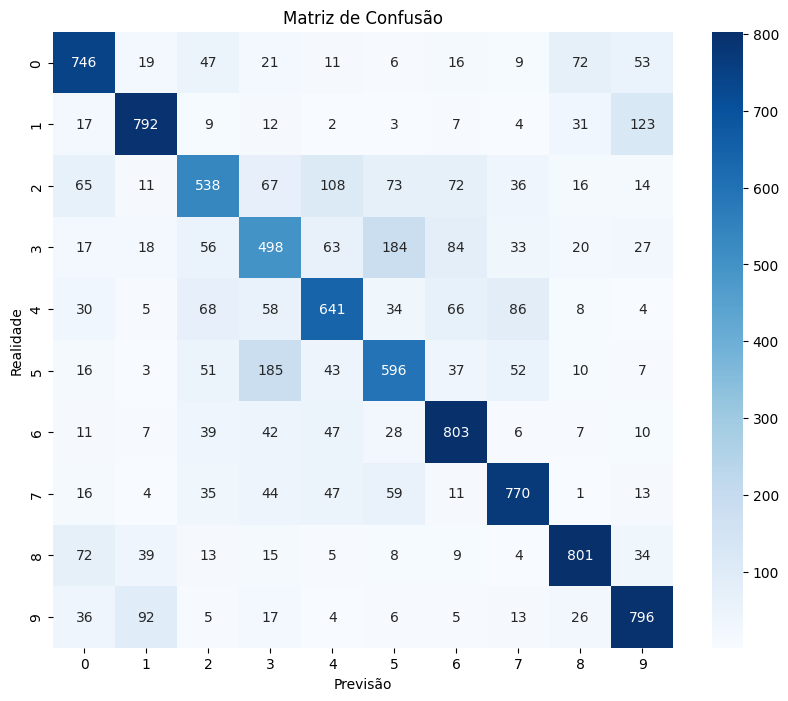

              precision    recall  f1-score   support

           0       0.73      0.75      0.74      1000
           1       0.80      0.79      0.80      1000
           2       0.62      0.54      0.58      1000
           3       0.52      0.50      0.51      1000
           4       0.66      0.64      0.65      1000
           5       0.60      0.60      0.60      1000
           6       0.72      0.80      0.76      1000
           7       0.76      0.77      0.77      1000
           8       0.81      0.80      0.80      1000
           9       0.74      0.80      0.77      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



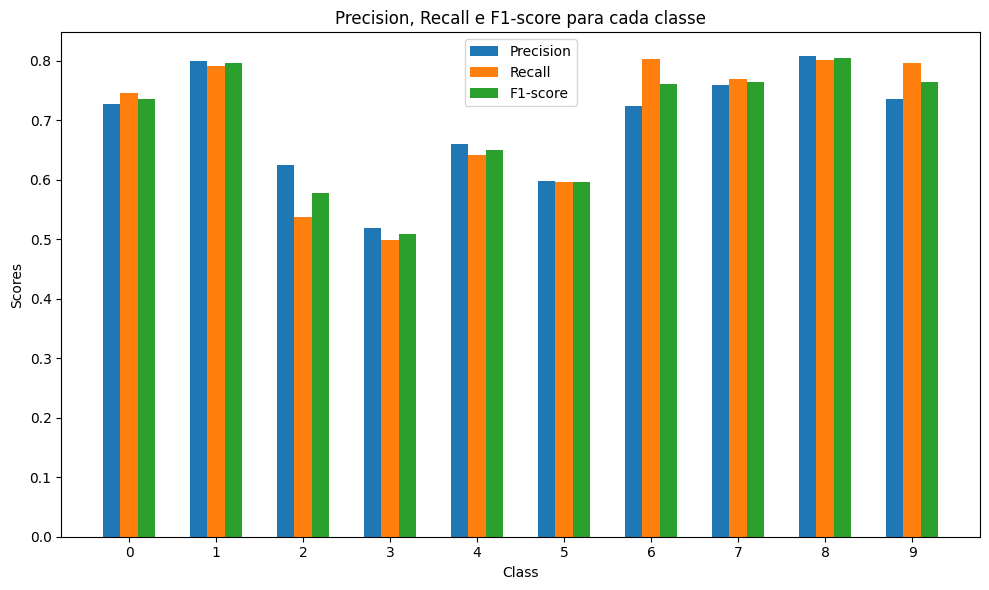

In [12]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Function to evaluate the model and get true and predicted labels
def evaluate_model(model, dataset):
    all_labels = []
    all_predictions = []

    for images, labels in dataset:
        predictions = model.predict(images)
        predicted_labels = np.argmax(predictions, axis=1)
        true_labels = labels.numpy()  # Convert to numpy array if not already

        all_labels.extend(true_labels)
        all_predictions.extend(predicted_labels)

    return np.array(all_labels), np.array(all_predictions)

# Get true and predicted labels for the test dataset
true_labels, predicted_labels = evaluate_model(model, test_dataset)

# Compute the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.title('Matriz de Confusão')
plt.xlabel('Previsão')
plt.ylabel('Realidade')
plt.show()

# Print classification report
class_names = [str(i) for i in range(10)]  # Define class names based on your dataset
print(classification_report(true_labels, predicted_labels, target_names=class_names))

# Extract precision, recall, and F1-score for each class from classification report
report = classification_report(true_labels, predicted_labels, target_names=class_names, output_dict=True)

metrics = {'precision': [], 'recall': [], 'f1-score': []}
for cls in class_names:
    metrics['precision'].append(report[cls]['precision'])
    metrics['recall'].append(report[cls]['recall'])
    metrics['f1-score'].append(report[cls]['f1-score'])

# Plot precision, recall, and F1-score
plt.figure(figsize=(10, 6))
bar_width = 0.2
index = np.arange(len(class_names))

plt.bar(index, metrics['precision'], bar_width, label='Precision')
plt.bar(index + bar_width, metrics['recall'], bar_width, label='Recall')
plt.bar(index + 2*bar_width, metrics['f1-score'], bar_width, label='F1-score')

plt.xlabel('Class')
plt.ylabel('Scores')
plt.title('Precision, Recall e F1-score para cada classe')
plt.xticks(index + bar_width, class_names)
plt.legend()

plt.tight_layout()
plt.show()